<a href="https://colab.research.google.com/github/ucfilho/Raianars_paper_one_revisited/blob/main/Case_Study/Relevant_Job__Title_Pictures_KMeans_v04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Describe...

----------
Author: Raiana Roland Seixas
09/07/2022

# Data load & Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.cluster import KMeans

In [3]:
!git clone https://github.com/RaianaSeixas/NLT
%cd NLT

fatal: destination path 'NLT' already exists and is not an empty directory.
/content/NLT


In [4]:
df=pd.read_csv('occupation_pictures.csv')
df

,Job Title,Pic Title,Num Resumes,Google Position,Strict Face Count,Relaxed Face Count,KB size,Height,Width,Resolution,Text Regions,Picture URL,Manual Label
0,3D Modeler,Our Top 19 3D Modeling Software Picks ...,1261,0,0,7,276.763672,1917,2301,4411017,2,https://format-magazine-production-res.cloudin...,NaN
1,3D Modeler,7 Tips for Beginner 3D Modelers ...,1261,1,0,3,44.343750,340,747,253980,5,http://static1.squarespace.com/static/5320f582...,NaN
2,3D Modeler,How to Become an Expert 3D Modeler ...,1261,2,0,2,43.088867,380,660,250800,8,https://www.gamedesigning.org/wp-content/uploa...,NaN
3,3D Modeler,What is 3D Modeling & What's It Used For?,1261,3,0,2,78.623047,330,750,247500,1,https://cdn.conceptartempire.com/images/04/522...,NaN
4,3D Modeler,Shoofping 3D Modeler ...,1261,4,0,1,97.517578,1075,1909,2052175,3,http://shoofping.com/wp-content/uploads/2017/1...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,Wind Turbine Engineer,Wind turbine technician fastest-growing ...,61,4,0,0,89.249023,720,1280,921600,0,https://i.ytimg.com/vi/lUf2mOYp1d4/maxresdefau...,good
654,Wind Turbine Engineer,How to Become a Wind Energy Engineer ...,61,5,0,0,37.949219,200,300,60000,0,https://www.environmentalscience.org/wp-conten...,NaN
655,Wind Turbine Engineer,Wind - Get Into Energy,61,6,0,1,324.730469,500,750,375000,1,http://getintoenergy.com/wp-content/uploads/20...,good
656,Wind Turbine Engineer,Wind-energy programs yield engineering ...,61,7,0,1,36.197266,920,613,563960,0,https://s.hdnux.com/photos/20/15/22/4248747/3/...,good


In [5]:
data=df.drop(columns=['Picture URL'])

In [6]:
data['Manual Label'].describe()

count      133
unique       2
top       good
freq        91
Name: Manual Label, dtype: object

# Exploratory Analysis

# Data Preprocessing

In [7]:
import nltk
ps = nltk.PorterStemmer()
wn=nltk.WordNetLemmatizer()
nltk.download("popular")
stopwords = nltk.corpus.stopwords.words('english')
import re
import string

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

## Clean up text

In [8]:
'''def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

data['Job Title'] = data['Job Title'].apply(lambda x: clean_text(x.lower()))
data['Pic Title'] = data['Pic Title'].apply(lambda x: clean_text(x.lower()))
data.head()'''

'def clean_text(text):\n    text = "".join([word for word in text if word not in string.punctuation])\n    tokens = re.split(\'\\W+\', text)\n    text = [word for word in tokens if word not in stopwords]\n    return text\n\ndata[\'Job Title\'] = data[\'Job Title\'].apply(lambda x: clean_text(x.lower()))\ndata[\'Pic Title\'] = data[\'Pic Title\'].apply(lambda x: clean_text(x.lower()))\ndata.head()'

## Stem / Lemmatize text

In [9]:
'''def stemming(text):
  stemmed=[ps.stem(word) for word in text]
  return stemmed

data['Stem Job Title'] = data['Job Title'].apply(lambda x: stemming(x))
data['Stem Pic Title'] = data['Pic Title'].apply(lambda x: stemming(x))
data.head()'''

"def stemming(text):\n  stemmed=[ps.stem(word) for word in text]\n  return stemmed\n\ndata['Stem Job Title'] = data['Job Title'].apply(lambda x: stemming(x))\ndata['Stem Pic Title'] = data['Pic Title'].apply(lambda x: stemming(x))\ndata.head()"

In [10]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

## Count vectorization 

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
count_vec=CountVectorizer(analyzer=clean_text)
X_count=count_vec.fit_transform(data['Job Title'])
X_count.shape

(658, 146)

In [13]:
cols=count_vec.get_feature_names()
X_job=pd.DataFrame(X_count.toarray())
X_job.columns=cols
X_job

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,3d,account,administr,admiss,aid,air,analysi,analyst,analyt,applic,...,suppli,support,system,teacher,technician,test,therapist,turbin,vice,wind
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [14]:
count_vec=CountVectorizer(analyzer=clean_text)
X_count=count_vec.fit_transform(data['Pic Title'])
cols=count_vec.get_feature_names()
X_pic=pd.DataFrame(X_count.toarray())
X_pic.columns=cols
X_pic.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(658, 829)

In [15]:
pd.DataFrame(X_count.toarray())

,0,1,2,3,4,5,6,7,8,9,...,819,820,821,822,823,824,825,826,827,828
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
654,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
656,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


##Data split

In [16]:
data=data.drop(columns=['Job Title','Pic Title'])

In [17]:
''' Data (with labels) to test the model '''

labaled= data[data['Manual Label'].notna()]
labaled.head()

,Num Resumes,Google Position,Strict Face Count,Relaxed Face Count,KB size,Height,Width,Resolution,Text Regions,Manual Label
21,1824,1,0,2,529.085938,1382,2200,3040400,2,good
24,1824,4,0,1,28.923828,446,600,267600,0,good
29,347272,2,0,0,56.383789,640,1280,819200,1,bad
32,347272,7,1,2,390.638672,844,1243,1049092,0,good
39,868,0,1,10,640.045898,1500,2000,3000000,0,good


In [18]:
yTest=labaled['Manual Label']
XTest=labaled.drop(columns=['Manual Label'])
#XTest

In [19]:
# Data to train the model

lIndex=labaled.index
XTrain= data.drop(lIndex)
XTrain= data.drop(columns=['Manual Label'])
XTrain

,Num Resumes,Google Position,Strict Face Count,Relaxed Face Count,KB size,Height,Width,Resolution,Text Regions
0,1261,0,0,7,276.763672,1917,2301,4411017,2
1,1261,1,0,3,44.343750,340,747,253980,5
2,1261,2,0,2,43.088867,380,660,250800,8
3,1261,3,0,2,78.623047,330,750,247500,1
4,1261,4,0,1,97.517578,1075,1909,2052175,3
...,...,...,...,...,...,...,...,...,...
653,61,4,0,0,89.249023,720,1280,921600,0
654,61,5,0,0,37.949219,200,300,60000,0
655,61,6,0,1,324.730469,500,750,375000,1
656,61,7,0,1,36.197266,920,613,563960,0


# Predictive Model

In [20]:
#Drop target feature
X = data.drop(columns=['Manual Label']) 
#scaler = preprocessing.StandardScaler()
#X = scaler.fit_transform(X)

In [21]:
Names = list(X_job.columns)
X[Names] = X_job[Names]
X.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


(658, 155)

In [22]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [23]:
y_pred = KMeans(n_clusters=2).fit_predict(X)

In [24]:
# get the elements containing label (we will use it to evaluate the method)
y = data['Manual Label'].replace({'good':0, 'bad':1})
index_no = data['Manual Label'].notna()
y_real = y[index_no].astype(int)
X_eval= X[index_no,:]
y_mod = y_pred[index_no]

In [25]:
y_real.shape, y_mod.shape

((133,), (133,))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




               precision    recall  f1-score   support

      0-Good       0.00      0.00      0.00        91
       1-Bad       0.32      1.00      0.48        42

    accuracy                           0.32       133
   macro avg       0.16      0.50      0.24       133
weighted avg       0.10      0.32      0.15       133



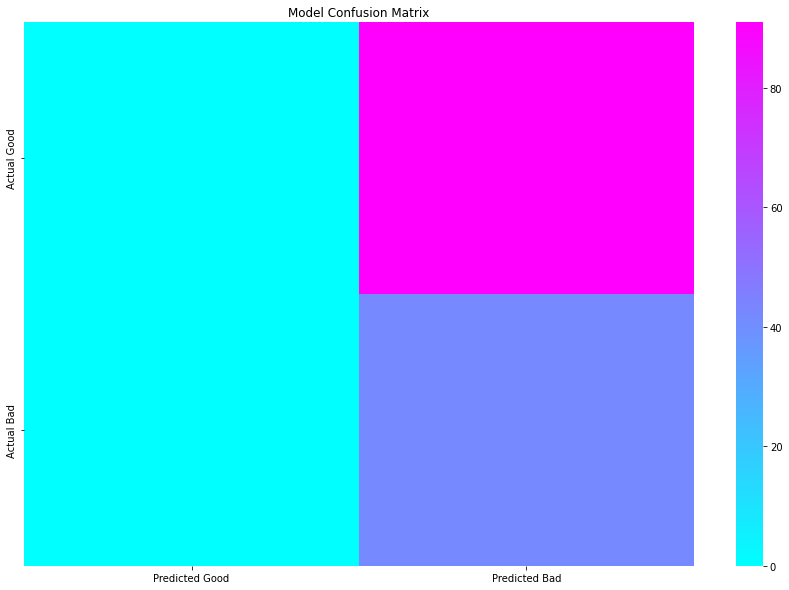

In [26]:
# Classification Report
print('\n\n', classification_report(y_real, y_mod, target_names=['0-Good', '1-Bad']))
# Confusion Matrix
con_matrix = pd.DataFrame(confusion_matrix(y_real, y_mod), columns=['Predicted Good', 'Predicted Bad'], index=['Actual Good', 'Actual Bad'])
  
plt.figure(figsize=(15,10))
sns.heatmap(data=con_matrix, cmap='cool');
plt.title('Model Confusion Matrix')
plt.show();